Mounted at /content/drive


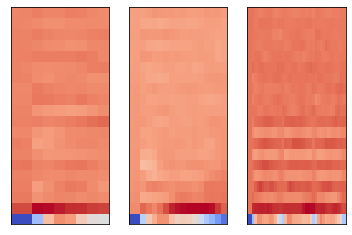

In [26]:
import pandas as pd
from pathlib import Path
from google.colab import drive
from librosa.feature import mfcc
from librosa.core import load
from librosa.display import specshow
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import spatial
import sklearn
drive.mount('/content/drive', force_remount=True)

p1 = '/content/drive/MyDrive/Colab Notebooks/Clustering/Unique Coughs/audio/p1/'
p2 = '/content/drive/MyDrive/Colab Notebooks/Clustering/Unique Coughs/audio/p2/'
p3 = '/content/drive/MyDrive/Colab Notebooks/Clustering/Unique Coughs/audio/p3/'
p4 = '/content/drive/MyDrive/Colab Notebooks/Clustering/Unique Coughs/audio/p4/'
p5 = '/content/drive/MyDrive/Colab Notebooks/Clustering/Unique Coughs/audio/p5/'
p6 = '/content/drive/MyDrive/Colab Notebooks/Clustering/Unique Coughs/audio/p6/'
p7 = '/content/drive/MyDrive/Colab Notebooks/Clustering/Unique Coughs/audio/p7/'
p8 = '/content/drive/MyDrive/Colab Notebooks/Clustering/Unique Coughs/audio/p8/'
table = '/content/drive/MyDrive/Colab Notebooks/Clustering/Table vs Pocket/table/'
pocket = '/content/drive/MyDrive/Colab Notebooks/Clustering/Table vs Pocket/table/'
sounds = '/content/drive/MyDrive/Colab Notebooks/Clustering/Pocket Sounds vs Pocket Coughs/sounds/'

def extract_mfcc(sound):
    data, frame = load(sound)
    return mfcc(data, frame)

mfcc1 = extract_mfcc(p1 + 'participant1_1.wav')
mfcc2 = extract_mfcc(p2 + 'participant2_1.wav')
mfcc3 = extract_mfcc(p3 + 'participant3_1.wav')
# Conversion to frequency per timeframe #
mfcc1_mean = np.mean(mfcc1, axis=1)
mfcc2_mean = np.mean(mfcc2, axis=1)
mfcc3_mean = np.mean(mfcc3, axis=1)

plt.subplot(1,3,1)
specshow(mfcc1)

plt.subplot(1,3,2)
specshow(mfcc2)

plt.subplot(1,3,3)
specshow(mfcc3)

Load all data

In [27]:
mfccs = []

for index, file in enumerate(os.listdir(sounds)):
     suffix = os.fsdecode(file)
     filename = sounds + suffix
     data, frame = load(filename)
     tmp = mfcc(data, frame)
     # Conversion to frequency per timeframe #
     mfcc_mean = np.mean(tmp, axis=1)
     mfccs.append(list(mfcc_mean))

for index, file in enumerate(os.listdir(pocket)):
     suffix = os.fsdecode(file)
     filename = pocket + suffix
     data, frame = load(filename)
     tmp = mfcc(data, frame)
     # Conversion to frequency per timeframe #
     mfcc_mean = np.mean(tmp, axis=1)
     mfccs.append(list(mfcc_mean))

len(mfccs)

254

In [28]:
df = pd.DataFrame.from_records(mfccs)
df.rename(columns = {0:'Coeff 1', 1:'Coeff 2', 2:'Coeff 3', 3:'Coeff 4', 4:'Coeff 5', 5:'Coeff 6', 6:'Coeff 7', 7:'Coeff 8', 8:'Coeff 9', 9:'Coeff 10', 10:'Coeff 11', 11:'Coeff 12', 12:'Coeff 13', 13:'Coeff 14', 14:'Coeff 15', 15:'Coeff 16', 16:'Coeff 17', 17:'Coeff 18', 18:'Coeff 19', 19:'Coeff 20'}, inplace = True)

In [29]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df.values)
scaled_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
print(scaled_df.describe())

            Coeff 1       Coeff 2       Coeff 3       Coeff 4       Coeff 5  \
count  2.540000e+02  2.540000e+02  2.540000e+02  2.540000e+02  2.540000e+02   
mean   1.454917e-08  3.754623e-09  1.642648e-08 -8.307104e-08  9.198827e-08   
std    1.001974e+00  1.001974e+00  1.001974e+00  1.001974e+00  1.001974e+00   
min   -3.535954e+00 -2.264069e+00 -2.437718e+00 -2.706544e+00 -2.807003e+00   
25%   -4.640092e-01 -6.554307e-01 -5.840860e-01 -4.366712e-01 -3.700698e-01   
50%    1.822024e-01  2.750081e-02  2.623040e-01  2.570266e-01  2.047806e-01   
75%    6.553386e-01  5.695623e-01  7.218006e-01  5.954148e-01  5.841468e-01   
max    1.978476e+00  2.684629e+00  1.828152e+00  2.033851e+00  2.313548e+00   

            Coeff 6       Coeff 7       Coeff 8       Coeff 9      Coeff 10  \
count  2.540000e+02  2.540000e+02  2.540000e+02  2.540000e+02  2.540000e+02   
mean  -1.199133e-07  2.487438e-08 -6.664456e-08  7.509247e-09 -2.440505e-08   
std    1.001974e+00  1.001974e+00  1.001974e+00  1.

In [30]:
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(scaled_df)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Explained variation per principal component: [0.31700966 0.16246586]
Cumulative variance explained by 2 principal components: 47.95%


In [32]:
dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=scaled_df.columns, index=['PC_1', 'PC_2'])
print('\n\n', dataset_pca)



        Coeff 1   Coeff 2   Coeff 3   Coeff 4   Coeff 5   Coeff 6   Coeff 7  \
PC_1  0.147653  0.080145  0.266571  0.171463  0.298944  0.188447  0.354560   
PC_2  0.073050  0.195004  0.001554  0.356109  0.073166  0.346828  0.106457   

       Coeff 8   Coeff 9  Coeff 10  Coeff 11  Coeff 12  Coeff 13  Coeff 14  \
PC_1  0.234019  0.251104  0.047467  0.207742  0.269991  0.031236  0.219942   
PC_2  0.151599  0.262687  0.454356  0.105250  0.228109  0.131740  0.114269   

      Coeff 15  Coeff 16  Coeff 17  Coeff 18  Coeff 19  Coeff 20  
PC_1  0.091555  0.255420  0.202534  0.282026  0.216502  0.306914  
PC_2  0.462561  0.240681  0.027122  0.135973  0.025040  0.095670  


In [33]:
print("*************** Most important features *************************")
print((dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())
print((dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())
print("******************************************************************")

*************** Most important features *************************
Coeff 7     0.354560
Coeff 20    0.306914
Name: PC_1, dtype: float32
Coeff 4     0.356109
Coeff 6     0.346828
Coeff 10    0.454356
Coeff 15    0.462561
Name: PC_2, dtype: float32
******************************************************************


Parameter: {'n_clusters': 2} Score 0.30598137
Parameter: {'n_clusters': 3} Score 0.35026798
Parameter: {'n_clusters': 4} Score 0.3809856
Parameter: {'n_clusters': 5} Score 0.39382455
Parameter: {'n_clusters': 6} Score 0.4080819
Parameter: {'n_clusters': 7} Score 0.4159291
Parameter: {'n_clusters': 8} Score 0.34416744
Parameter: {'n_clusters': 9} Score 0.34935606
Parameter: {'n_clusters': 10} Score 0.36501247
Parameter: {'n_clusters': 15} Score 0.2779083
Parameter: {'n_clusters': 20} Score 0.2207154


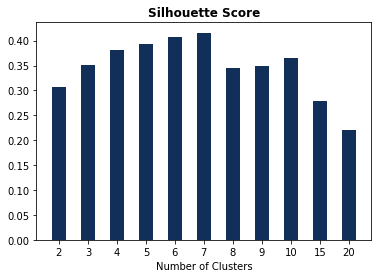

In [34]:
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# candidate values for our number of cluster
parameters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(scaled_df)          # fit model on wine dataset, this will find clusters based on parameter p
    ss = silhouette_score(scaled_df, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#122f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

In [19]:
# fitting KMeans
optimum_num_clusters = 9   
kmeans = KMeans(n_clusters=optimum_num_clusters)    
kmeans.fit(scaled_df)
centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


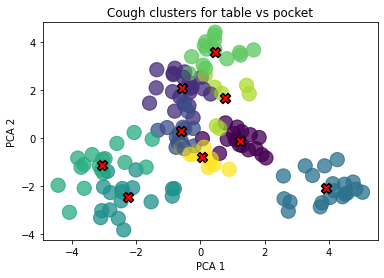

In [21]:
# ------------------ Using Matplotlib for plotting-----------------------
x = pca_2_result[:, 0]
y = pca_2_result[:, 1]

plt.scatter(x, y, c=kmeans.labels_, alpha=0.5, s=200)  # plot different colors per cluster
plt.title('Cough clusters for table vs pocket')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=100, linewidths=1.5,
            color='red', edgecolors="black", lw=1.5)

plt.show()

In [18]:
print(kmeans.predict(scaled_df))

[0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]


_________________________________________________________________